In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import plotly.express as px
from statsmodels.tsa.stattools import adfuller, kpss, grangercausalitytests
from statsmodels.tsa.api import VAR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from numpy import log

In [2]:
import os
import sys
import datetime as dt
#import missingno as mno 
import warnings
warnings.filterwarnings("ignore")
import logging
logging.disable(logging.CRITICAL)

LOAD DATA
--

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
import plotly.express as px
import pandas as pd
import os

# the directory where the data files are stored
dir_path = os.getcwd() + "/data/"
#create dataframes
df_new = pd.DataFrame()
df_old = pd.DataFrame()

# list file and directories
res = os.listdir(dir_path)
#for each files in the directory 
for file in os.listdir(dir_path):
    ## not prety but i keep getting this '.ipynb_checkpoints' which i am omitting through this if
    ## if the file name is not the bellow
    if file != ".ipynb_checkpoints":
        #print(file)
        ## read the csv file and add it to the dataframe
        df_old = pd.read_csv(dir_path+file)
        #concatenate the old dataframe to the new dataframe
        df_new = pd.concat([df_new, df_old])

In [6]:
df_new.reset_index()
df_new.drop_duplicates(inplace=True)

In [7]:
df_new.min()

Magna_6 Wind Direction                                                    0.0
Magna_6 Wind Speed (m/s)                                                  0.0
Magna_6 Meteo Ambient Temperature (C)                                     0.5
Magna_6 Meteo Air Pressure (hpa)                                        962.9
Magna_6 Meteo Relative Humidity                                          29.9
Magna_6 Meteo Dew Point Temperature (C)                                   0.0
Power Supply (V)                                                       12.842
Magna_6 Water EC muS/cm                                                   0.0
Magna_6 Water Level Above Sensor mm                                       1.0
Magna_6 Segment 1_ (10-30cm) Soil Moisture_%                              0.0
Temp_1                                                                      0
Magna_6 Segment 1_ (10-30 cm) Soil Electrical Conductivity_S/m            1.3
Magna_6 Segment 2_ (40-60 cm) Soil Moisture_%                   

In [8]:
## check the dataframe
df= df_new.copy()
#we have to reset the index otherwise it will contain duplicates
df.reset_index(drop=True, inplace=True)

In [9]:
df.tail()

,Magna_6 Wind Direction,Magna_6 Wind Speed (m/s),Magna_6 Meteo Ambient Temperature (C),Magna_6 Meteo Air Pressure (hpa),Magna_6 Meteo Relative Humidity,Magna_6 Meteo Dew Point Temperature (C),Power Supply (V),Magna_6 Water EC muS/cm,Magna_6 Water Level Above Sensor mm,Magna_6 Segment 1_ (10-30cm) Soil Moisture_%,...,Dew Point Temperature (x10),Magna_6 Precipitation_24hr_mm,Magna_6 Cumulative Precipitation_mm,Magna_6 CTD_Temperature_C,CTD_Pressure_BAR,CTD_Conductivity__mS,Metres above MSL,TOW _MH2O,data_date,data_time
26562,70.3,2.7,9.7,975.2,94.3,8.8,13.150,459.7,1997.0,88.49,...,88,26,2182,10.819336,0.195843,0.459706,206.57,0.45,31/10/2022,23:18:00
26563,92.4,1.6,9.5,974.9,93.9,8.6,13.150,459.8,2000.3,88.49,...,86,28,2184,10.819336,0.196162,0.459808,206.58,0.45,31/10/2022,23:28:00
26564,111.3,2.9,9.4,974.6,93.8,8.5,13.150,459.8,2003.9,88.67,...,85,31,2187,10.819336,0.196516,0.459808,206.58,0.45,31/10/2022,23:38:00
26565,88.6,4.5,9.0,974.2,93.1,8.0,13.150,459.8,2008.1,88.77,...,80,33,2189,10.819336,0.196923,0.459808,206.58,0.44,31/10/2022,23:48:00
26566,82.3,2.2,9.0,973.7,93.8,8.1,13.135,459.9,2012.2,88.77,...,81,36,2192,10.819336,0.197334,0.459909,206.59,0.44,31/10/2022,23:58:00


In [10]:
df['date']=pd.to_datetime(df['data_date'] +" "+ df['data_time'],
               errors='raise',
                   utc="ns",
                   exact=True,
                   unit=None,
               format="%d/%m/%Y %H:%M:%S",
                   infer_datetime_format=True,
                   origin='unix', cache=True)

In [11]:
df.tail()

,Magna_6 Wind Direction,Magna_6 Wind Speed (m/s),Magna_6 Meteo Ambient Temperature (C),Magna_6 Meteo Air Pressure (hpa),Magna_6 Meteo Relative Humidity,Magna_6 Meteo Dew Point Temperature (C),Power Supply (V),Magna_6 Water EC muS/cm,Magna_6 Water Level Above Sensor mm,Magna_6 Segment 1_ (10-30cm) Soil Moisture_%,...,Magna_6 Precipitation_24hr_mm,Magna_6 Cumulative Precipitation_mm,Magna_6 CTD_Temperature_C,CTD_Pressure_BAR,CTD_Conductivity__mS,Metres above MSL,TOW _MH2O,data_date,data_time,date
26562,70.3,2.7,9.7,975.2,94.3,8.8,13.150,459.7,1997.0,88.49,...,26,2182,10.819336,0.195843,0.459706,206.57,0.45,31/10/2022,23:18:00,2022-10-31 23:18:00+00:00
26563,92.4,1.6,9.5,974.9,93.9,8.6,13.150,459.8,2000.3,88.49,...,28,2184,10.819336,0.196162,0.459808,206.58,0.45,31/10/2022,23:28:00,2022-10-31 23:28:00+00:00
26564,111.3,2.9,9.4,974.6,93.8,8.5,13.150,459.8,2003.9,88.67,...,31,2187,10.819336,0.196516,0.459808,206.58,0.45,31/10/2022,23:38:00,2022-10-31 23:38:00+00:00
26565,88.6,4.5,9.0,974.2,93.1,8.0,13.150,459.8,2008.1,88.77,...,33,2189,10.819336,0.196923,0.459808,206.58,0.44,31/10/2022,23:48:00,2022-10-31 23:48:00+00:00
26566,82.3,2.2,9.0,973.7,93.8,8.1,13.135,459.9,2012.2,88.77,...,36,2192,10.819336,0.197334,0.459909,206.59,0.44,31/10/2022,23:58:00,2022-10-31 23:58:00+00:00


In [12]:
df.set_index("date", inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26567 entries, 2022-06-01 00:08:00+00:00 to 2022-10-31 23:58:00+00:00
Data columns (total 36 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Magna_6 Wind Direction                                           26567 non-null  float64
 1   Magna_6 Wind Speed (m/s)                                         26567 non-null  float64
 2   Magna_6 Meteo Ambient Temperature (C)                            26567 non-null  float64
 3   Magna_6 Meteo Air Pressure (hpa)                                 26567 non-null  float64
 4   Magna_6 Meteo Relative Humidity                                  26567 non-null  float64
 5   Magna_6 Meteo Dew Point Temperature (C)                          26567 non-null  float64
 6   Power Supply (V)                                                 26567 non-null  float6

In [14]:
latest_date = df.index.max()
min_date = df.index.min()

df = df.loc["2022-05-23 00:00:00+00:00": str(latest_date)]

In [15]:
df.index.min()

Timestamp('2022-05-23 00:02:00+0000', tz='UTC')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23405 entries, 2022-06-01 00:08:00+00:00 to 2022-10-31 23:58:00+00:00
Data columns (total 36 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Magna_6 Wind Direction                                           23405 non-null  float64
 1   Magna_6 Wind Speed (m/s)                                         23405 non-null  float64
 2   Magna_6 Meteo Ambient Temperature (C)                            23405 non-null  float64
 3   Magna_6 Meteo Air Pressure (hpa)                                 23405 non-null  float64
 4   Magna_6 Meteo Relative Humidity                                  23405 non-null  float64
 5   Magna_6 Meteo Dew Point Temperature (C)                          23405 non-null  float64
 6   Power Supply (V)                                                 23405 non-null  float6

In [17]:
df.isnull().sum()

Magna_6 Wind Direction                                             0
Magna_6 Wind Speed (m/s)                                           0
Magna_6 Meteo Ambient Temperature (C)                              0
Magna_6 Meteo Air Pressure (hpa)                                   0
Magna_6 Meteo Relative Humidity                                    0
Magna_6 Meteo Dew Point Temperature (C)                            0
Power Supply (V)                                                   0
Magna_6 Water EC muS/cm                                            0
Magna_6 Water Level Above Sensor mm                                0
Magna_6 Segment 1_ (10-30cm) Soil Moisture_%                       0
Temp_1                                                             0
Magna_6 Segment 1_ (10-30 cm) Soil Electrical Conductivity_S/m     0
Magna_6 Segment 2_ (40-60 cm) Soil Moisture_%                      0
Temp_2                                                             0
Magna_6 Segment 2_ (40-60 cm) Soil

In [18]:
#rename columns with protacted name strings as well as the time and date column
df= df.rename(columns= {
                       "Magna_6 Segment 1_ (10-30cm) Soil Moisture_%":"segment1(10-30cm)",
                       "Magna_6 Segment 2_ (40-60 cm) Soil Moisture_%":"segment2(40-60cm)",
                       "Magna_6 Segment 3_ (70-90 cm) Soil Moisture_%":"segment3(70-90cm)",
                       "Magna_6 Segment 1_ (10-30 cm) Soil Electrical Conductivity_S/m":"segment1(EC)",
                       "Magna_6 Segment 2_ (40-60 cm) Soil Electrical Conductivity__S/m":"segment2(EC)",
                        "Magna_6 Segment 3_ (70-90 cm) Soil Electrical Conductivity__S/m":"segment3(EC)"
                       })
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23405 entries, 2022-06-01 00:08:00+00:00 to 2022-10-31 23:58:00+00:00
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Magna_6 Wind Direction                   23405 non-null  float64
 1   Magna_6 Wind Speed (m/s)                 23405 non-null  float64
 2   Magna_6 Meteo Ambient Temperature (C)    23405 non-null  float64
 3   Magna_6 Meteo Air Pressure (hpa)         23405 non-null  float64
 4   Magna_6 Meteo Relative Humidity          23405 non-null  float64
 5   Magna_6 Meteo Dew Point Temperature (C)  23405 non-null  float64
 6   Power Supply (V)                         23405 non-null  float64
 7   Magna_6 Water EC muS/cm                  23405 non-null  float64
 8   Magna_6 Water Level Above Sensor mm      23405 non-null  float64
 9   segment1(10-30cm)                        23405 non-null  float64
 10 

In [19]:
df.tail()

,Magna_6 Wind Direction,Magna_6 Wind Speed (m/s),Magna_6 Meteo Ambient Temperature (C),Magna_6 Meteo Air Pressure (hpa),Magna_6 Meteo Relative Humidity,Magna_6 Meteo Dew Point Temperature (C),Power Supply (V),Magna_6 Water EC muS/cm,Magna_6 Water Level Above Sensor mm,segment1(10-30cm),...,Dew Point Temperature (x10),Magna_6 Precipitation_24hr_mm,Magna_6 Cumulative Precipitation_mm,Magna_6 CTD_Temperature_C,CTD_Pressure_BAR,CTD_Conductivity__mS,Metres above MSL,TOW _MH2O,data_date,data_time
date,,,,,,,,,,,,,,,,,,,,,
2022-10-31 23:18:00+00:00,70.3,2.7,9.7,975.2,94.3,8.8,13.150,459.7,1997.0,88.49,...,88,26,2182,10.819336,0.195843,0.459706,206.57,0.45,31/10/2022,23:18:00
2022-10-31 23:28:00+00:00,92.4,1.6,9.5,974.9,93.9,8.6,13.150,459.8,2000.3,88.49,...,86,28,2184,10.819336,0.196162,0.459808,206.58,0.45,31/10/2022,23:28:00
2022-10-31 23:38:00+00:00,111.3,2.9,9.4,974.6,93.8,8.5,13.150,459.8,2003.9,88.67,...,85,31,2187,10.819336,0.196516,0.459808,206.58,0.45,31/10/2022,23:38:00
2022-10-31 23:48:00+00:00,88.6,4.5,9.0,974.2,93.1,8.0,13.150,459.8,2008.1,88.77,...,80,33,2189,10.819336,0.196923,0.459808,206.58,0.44,31/10/2022,23:48:00
2022-10-31 23:58:00+00:00,82.3,2.2,9.0,973.7,93.8,8.1,13.135,459.9,2012.2,88.77,...,81,36,2192,10.819336,0.197334,0.459909,206.59,0.44,31/10/2022,23:58:00


In [20]:
df.index

DatetimeIndex(['2022-06-01 00:08:00+00:00', '2022-06-01 00:18:00+00:00',
               '2022-06-01 00:28:00+00:00', '2022-06-01 00:38:00+00:00',
               '2022-06-01 00:48:00+00:00', '2022-06-01 00:58:00+00:00',
               '2022-06-01 01:08:00+00:00', '2022-06-01 01:18:00+00:00',
               '2022-06-01 01:28:00+00:00', '2022-06-01 01:38:00+00:00',
               ...
               '2022-10-31 22:28:00+00:00', '2022-10-31 22:38:00+00:00',
               '2022-10-31 22:48:00+00:00', '2022-10-31 22:58:00+00:00',
               '2022-10-31 23:08:00+00:00', '2022-10-31 23:18:00+00:00',
               '2022-10-31 23:28:00+00:00', '2022-10-31 23:38:00+00:00',
               '2022-10-31 23:48:00+00:00', '2022-10-31 23:58:00+00:00'],
              dtype='datetime64[ns, UTC]', name='date', length=23405, freq=None)

In [21]:
import plotly.graph_objects as go
fig1 = go.Figure(go.Scatter(x=df.index, y=df["segment1(10-30cm)"]))

fig1.show()


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23405 entries, 2022-06-01 00:08:00+00:00 to 2022-10-31 23:58:00+00:00
Data columns (total 36 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Magna_6 Wind Direction                   23405 non-null  float64
 1   Magna_6 Wind Speed (m/s)                 23405 non-null  float64
 2   Magna_6 Meteo Ambient Temperature (C)    23405 non-null  float64
 3   Magna_6 Meteo Air Pressure (hpa)         23405 non-null  float64
 4   Magna_6 Meteo Relative Humidity          23405 non-null  float64
 5   Magna_6 Meteo Dew Point Temperature (C)  23405 non-null  float64
 6   Power Supply (V)                         23405 non-null  float64
 7   Magna_6 Water EC muS/cm                  23405 non-null  float64
 8   Magna_6 Water Level Above Sensor mm      23405 non-null  float64
 9   segment1(10-30cm)                        23405 non-null  float64
 10 

In [166]:
### !!!!! CHECK!! If removing rows from the dataseet, doesnt this create a problem in the consistency of my timeline
## !!!!Should I instead replace it with mean of the previous readings ??????????

#19/04/2022	Installation on site
#22/05/2022	Problem with moisture probe – removed and cleaned
#22/05/2022	pH meter removed
#12/06/2022	New and old pH probe installed 
#06/07/2022	Testing pH first try
#27/07/2022	Testing pH second try
#13/08/2022	Changed batteries – data slave
#19/09/2022	Made changes to pH and conductivity sensor – old/new swap

##df[df.data_date != '19/05/2022']
## delete the above dates as required in the readme file provided

df.drop(df[df['data_date'] == '19/05/2022'].index, inplace=True)
df.drop(df[df['data_date'] == '22/05/2022'].index, inplace=True)

In [23]:
## replace no-data with column mean
df['Metres above MSL'] = df['Metres above MSL'].replace(['no-data'],0)
df['TOW _MH2O'] = df['TOW _MH2O'].replace(['no-data'],0)

In [24]:
df[df['Metres above MSL']== "no-data"]

,Magna_6 Wind Direction,Magna_6 Wind Speed (m/s),Magna_6 Meteo Ambient Temperature (C),Magna_6 Meteo Air Pressure (hpa),Magna_6 Meteo Relative Humidity,Magna_6 Meteo Dew Point Temperature (C),Power Supply (V),Magna_6 Water EC muS/cm,Magna_6 Water Level Above Sensor mm,segment1(10-30cm),...,Dew Point Temperature (x10),Magna_6 Precipitation_24hr_mm,Magna_6 Cumulative Precipitation_mm,Magna_6 CTD_Temperature_C,CTD_Pressure_BAR,CTD_Conductivity__mS,Metres above MSL,TOW _MH2O,data_date,data_time
date,,,,,,,,,,,,,,,,,,,,,


In [25]:
#convert string to float
df['Metres above MSL'] = pd.to_numeric(df['Metres above MSL'])#.astype(float)
df['TOW _MH2O'] = pd.to_numeric(df['TOW _MH2O'])#.astype(float)

In [26]:
## check the dataframe

In [27]:
del df['Temp_2']

del df['Temp_1']

del df['Temp_3']

df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23405 entries, 2022-06-01 00:08:00+00:00 to 2022-10-31 23:58:00+00:00
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Magna_6 Wind Direction                   23405 non-null  float64
 1   Magna_6 Wind Speed (m/s)                 23405 non-null  float64
 2   Magna_6 Meteo Ambient Temperature (C)    23405 non-null  float64
 3   Magna_6 Meteo Air Pressure (hpa)         23405 non-null  float64
 4   Magna_6 Meteo Relative Humidity          23405 non-null  float64
 5   Magna_6 Meteo Dew Point Temperature (C)  23405 non-null  float64
 6   Power Supply (V)                         23405 non-null  float64
 7   Magna_6 Water EC muS/cm                  23405 non-null  float64
 8   Magna_6 Water Level Above Sensor mm      23405 non-null  float64
 9   segment1(10-30cm)                        23405 non-null  float64
 10 

In [28]:
#std of columns
std_dev=df.loc['22-05-21':'22-05-23'].std().sort_values(ascending=False)
std_dev

Wind Direction (x10)                       897.125812
Magna_6 Cumulative Precipitation_mm        550.259484
Magna_6 Water Level Above Sensor mm        212.950267
Magna_6 ORP_mV                             166.497363
Relative Humidity (x10)                    119.900923
Magna_6 Wind Direction                      89.712581
Air Pressure (x10)                          82.374045
Temperature (x10)                           40.527355
Magna_6 Water EC muS/cm                     40.129063
Dew Point Temperature (x10)                 29.150072
Magna_6 Precipitation_24hr_mm               16.681611
Wind Speed (x10)                            15.653426
Magna_6 Meteo Relative Humidity             11.990092
segment1(10-30cm)                           11.485730
Magna_6 Meteo Air Pressure (hpa)             8.237405
segment2(40-60cm)                            5.958958
segment3(70-90cm)                            5.090940
Magna_6 Meteo Ambient Temperature (C)        4.052736
Magna_6 pH_Sensor_Temperatur

In [29]:
variance=df.loc['22-05-21':'22-09-01'].var().sort_values(ascending=False)
variance

Magna_6 Wind Direction                     NaN
Magna_6 Wind Speed (m/s)                   NaN
Magna_6 Meteo Ambient Temperature (C)      NaN
Magna_6 Meteo Air Pressure (hpa)           NaN
Magna_6 Meteo Relative Humidity            NaN
Magna_6 Meteo Dew Point Temperature (C)    NaN
Power Supply (V)                           NaN
Magna_6 Water EC muS/cm                    NaN
Magna_6 Water Level Above Sensor mm        NaN
segment1(10-30cm)                          NaN
segment1(EC)                               NaN
segment2(40-60cm)                          NaN
segment2(EC)                               NaN
segment3(70-90cm)                          NaN
segment3(EC)                               NaN
Magna_6 PH                                 NaN
Magna_6 ORP_mV                             NaN
Magna_6 pH_Sensor_Temperature_C            NaN
Wind Speed (x10)                           NaN
Wind Direction (x10)                       NaN
Temperature (x10)                          NaN
Air Pressure 

In [30]:
#compare variance from all 3 segments


In [31]:
segment1_var=df.loc['2022-06-01 00:02:00+00:00':'2022-09-01 23:58:00+00:00']['segment1(10-30cm)'].var()
segment2_var=df.loc['2022-06-01 00:02:00+00:00':'2022-09-01 23:58:00+00:00']['segment2(40-60cm)'].var()
segment3_var=df.loc['2022-06-01 00:02:00+00:00':'2022-09-01 23:58:00+00:00']['segment3(70-90cm)'].var()
print("segment1: ", segment1_var )
print("segment2: ", segment2_var )
print("segment3: ", segment3_var )

segment1:  70.04916350959519
segment2:  7.007507320348243
segment3:  4.9442877448350595


In [32]:
segment1_std=df.loc['2022-06-01 00:02:00+00:00':'2022-09-01 23:58:00+00:00']['segment1(10-30cm)'].std()
segment2_std=df.loc['2022-06-01 00:02:00+00:00':'2022-09-01 23:58:00+00:00']['segment2(40-60cm)'].std()
segment3_std=df.loc['2022-06-01 00:02:00+00:00':'2022-09-01 23:58:00+00:00']['segment3(70-90cm)'].std()
print("segment1: ", segment1_std )
print("segment2: ", segment2_std )
print("segment3: ", segment3_std )

segment1:  8.369537831301988
segment2:  2.6471696810647107
segment3:  2.223575441678348


<AxesSubplot:xlabel='segment1(10-30cm)', ylabel='Density'>

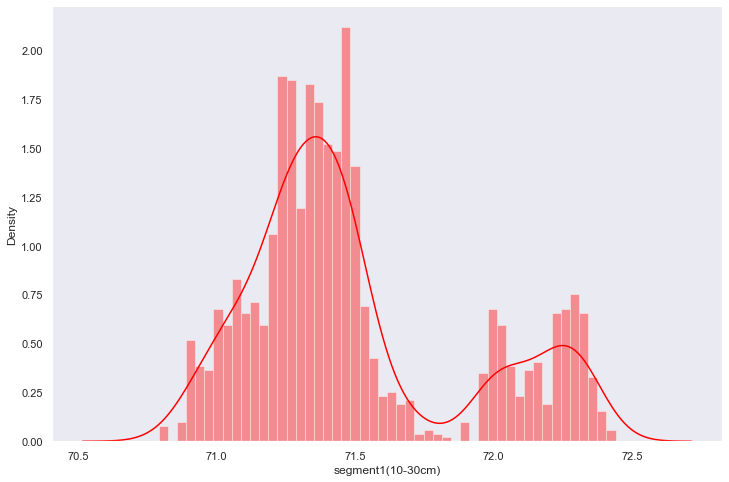

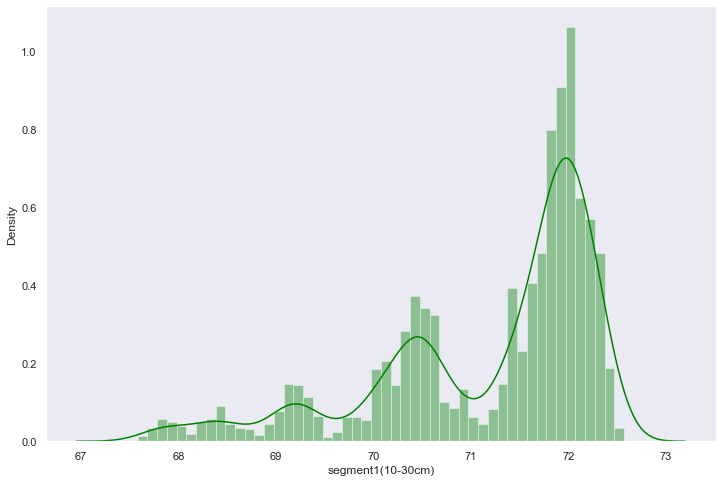

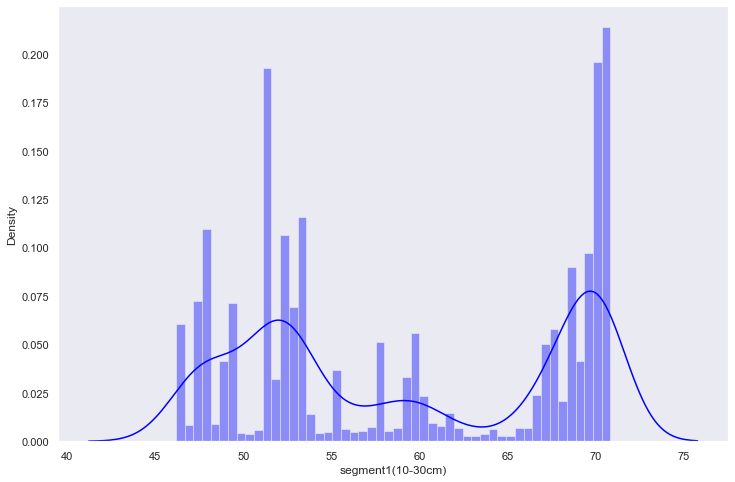

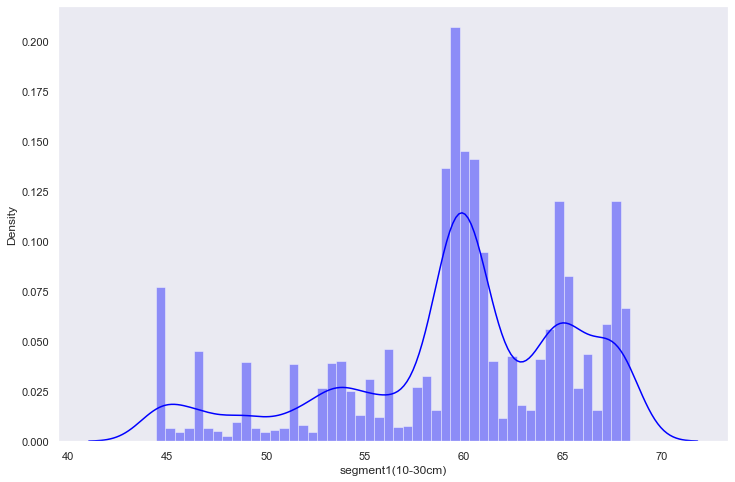

In [33]:
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="dark", color_codes=True)
#Compare the deviation for the last 4 months
plt.figure(figsize= (12,8))
sns.distplot(df.loc['2022-05-01 00:02:00+00:00':'2022-06-01 23:58:00+00:00']['segment1(10-30cm)'], 
            color= 'red',
            bins = 50)
plt.figure(figsize= (12,8))
sns.distplot(df.loc['2022-06-01 00:02:00+00:00':'2022-07-01 23:58:00+00:00']['segment1(10-30cm)'],
             color= 'green',
            bins = 50)
plt.figure(figsize= (12,8))
sns.distplot(df.loc['2022-07-01 00:02:00+00:00':'2022-08-01 23:58:00+00:00']['segment1(10-30cm)'],
             color= 'blue',
            bins = 50)
plt.figure(figsize= (12,8))
sns.distplot(df.loc['2022-08-01 00:02:00+00:00':'2022-09-01 23:58:00+00:00']['segment1(10-30cm)'],
             color= 'blue',
            bins = 50)

In [34]:
# remove the date and time column
del df['data_date']

del df['data_time']

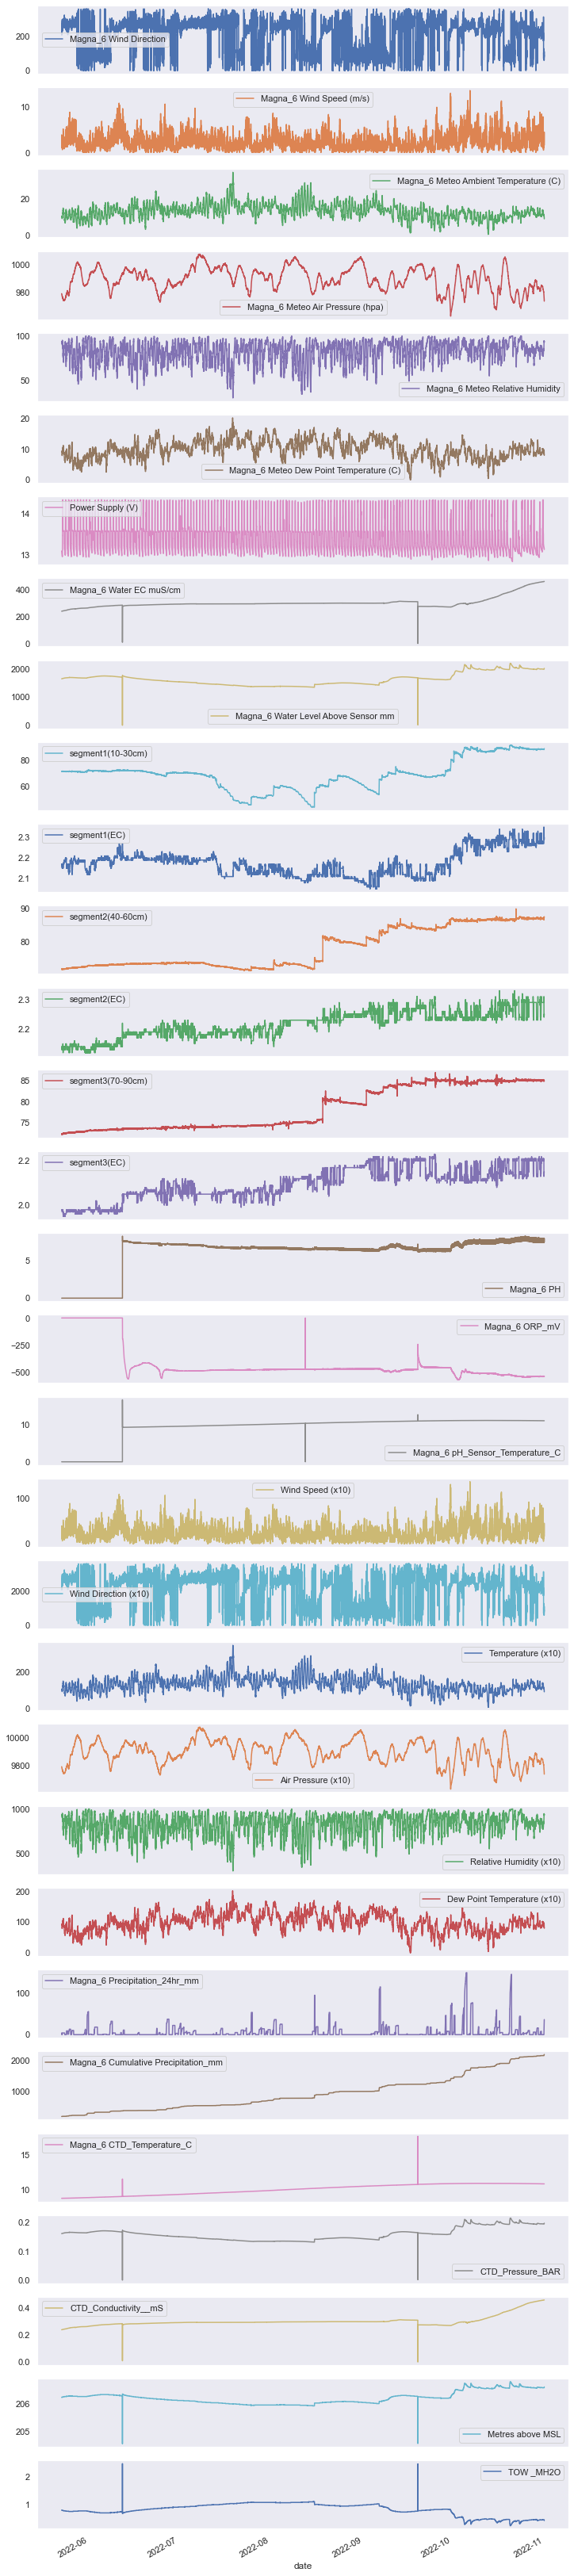

In [35]:
df.plot(subplots=True, figsize=(12,65));

In [36]:
# delete X10
del df["Wind Speed (x10)"]
del df["Wind Direction (x10)"]
del df["Temperature (x10)"]
del df["Air Pressure (x10)"]
del df["Relative Humidity (x10)"]
del df["Dew Point Temperature (x10)"]

In [37]:
#remove columns for segment 2 and 3
del df['segment2(40-60cm)']
del df['segment3(70-90cm)']
del df['segment2(EC)']
del df['segment3(EC)']

In [38]:
df.columns

Index(['Magna_6 Wind Direction', 'Magna_6 Wind Speed (m/s)',
       'Magna_6 Meteo Ambient Temperature (C)',
       'Magna_6 Meteo Air Pressure (hpa)', 'Magna_6 Meteo Relative Humidity',
       'Magna_6 Meteo Dew Point Temperature (C)', 'Power Supply (V)',
       'Magna_6 Water EC muS/cm', 'Magna_6 Water Level Above Sensor mm',
       'segment1(10-30cm)', 'segment1(EC)', 'Magna_6 PH', 'Magna_6 ORP_mV',
       'Magna_6 pH_Sensor_Temperature_C', 'Magna_6 Precipitation_24hr_mm',
       'Magna_6 Cumulative Precipitation_mm', 'Magna_6 CTD_Temperature_C',
       'CTD_Pressure_BAR', 'CTD_Conductivity__mS', 'Metres above MSL',
       'TOW _MH2O'],
      dtype='object')

In [183]:
#test_df = df.copy()

In [39]:
#01/06/2022 till 12/012/2022
df.loc['2022-05-23 00:08:00+00:00':'2022-06-12 09:48:00+00:00']

,Magna_6 Wind Direction,Magna_6 Wind Speed (m/s),Magna_6 Meteo Ambient Temperature (C),Magna_6 Meteo Air Pressure (hpa),Magna_6 Meteo Relative Humidity,Magna_6 Meteo Dew Point Temperature (C),Power Supply (V),Magna_6 Water EC muS/cm,Magna_6 Water Level Above Sensor mm,segment1(10-30cm),...,Magna_6 PH,Magna_6 ORP_mV,Magna_6 pH_Sensor_Temperature_C,Magna_6 Precipitation_24hr_mm,Magna_6 Cumulative Precipitation_mm,Magna_6 CTD_Temperature_C,CTD_Pressure_BAR,CTD_Conductivity__mS,Metres above MSL,TOW _MH2O
date,,,,,,,,,,,,,,,,,,,,,
2022-06-01 00:08:00+00:00,328.2,0.5,7.1,988.9,98.3,6.9,13.115,264.5,1685.9,72.30,...,0.0,0.0,0.0,55,308,8.848389,0.165328,0.264529,206.26,0.77
2022-06-01 00:18:00+00:00,0.0,0.0,7.1,988.9,98.4,6.9,13.087,264.5,1685.2,72.35,...,0.0,0.0,0.0,0,308,8.848389,0.165260,0.264529,206.26,0.77
2022-06-01 00:28:00+00:00,26.3,0.4,7.0,988.9,98.5,6.8,13.087,264.6,1686.2,72.31,...,0.0,0.0,0.0,0,308,8.848389,0.165357,0.264641,206.26,0.77
2022-06-01 00:38:00+00:00,255.3,0.5,7.0,989.0,98.8,6.8,13.087,264.7,1686.3,72.23,...,0.0,0.0,0.0,0,308,8.848389,0.165365,0.264703,206.26,0.77
2022-06-01 00:48:00+00:00,292.4,0.4,6.7,988.9,98.5,6.5,13.087,264.8,1686.5,72.37,...,0.0,0.0,0.0,0,308,8.848389,0.165394,0.264754,206.26,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-01 23:18:00+00:00,77.4,1.2,5.7,995.0,97.4,5.3,13.136,267.4,1703.4,71.98,...,0.0,0.0,0.0,1,309,8.861084,0.167046,0.267443,206.28,0.75
2022-06-01 23:28:00+00:00,205.8,0.3,5.8,994.9,98.3,5.6,13.136,267.4,1703.5,71.95,...,0.0,0.0,0.0,1,309,8.861084,0.167055,0.267393,206.28,0.75
2022-06-01 23:38:00+00:00,60.3,0.4,6.0,994.9,97.9,5.7,13.136,267.6,1703.6,71.97,...,0.0,0.0,0.0,1,309,8.861084,0.167066,0.267555,206.28,0.75


In [185]:
df.loc['2022-05-23 00:00:00+00:00':'2022-06-12 09:48:00+00:00', 'Magna_6 PH'] = df['Magna_6 PH'].mean()
df.loc['2022-05-23 00:00:00+00:00':'2022-06-12 09:48:00+00:00', 'Magna_6 ORP_mV'] = df['Magna_6 ORP_mV'].mean()
df.loc['2022-05-23 00:00:00+00:00':'2022-06-12 09:48:00+00:00', 'Magna_6 pH_Sensor_Temperature_C'] = df['Magna_6 pH_Sensor_Temperature_C'].mean()

In [186]:
df.loc['2022-06-12 09:48:00+00:00':'2022-06-12 09:58:00+00:00']

,Magna_6 Wind Direction,Magna_6 Wind Speed (m/s),Magna_6 Meteo Ambient Temperature (C),Magna_6 Meteo Air Pressure (hpa),Magna_6 Meteo Relative Humidity,Magna_6 Meteo Dew Point Temperature (C),Power Supply (V),Magna_6 Water EC muS/cm,Magna_6 Water Level Above Sensor mm,segment1(10-30cm),...,Magna_6 PH,Magna_6 ORP_mV,Magna_6 pH_Sensor_Temperature_C,Magna_6 Precipitation_24hr_mm,Magna_6 Cumulative Precipitation_mm,Magna_6 CTD_Temperature_C,CTD_Pressure_BAR,CTD_Conductivity__mS,Metres above MSL,TOW _MH2O
date,,,,,,,,,,,,,,,,,,,,,
2022-06-12 09:48:00+00:00,247.8,3.7,12.7,993.5,71.2,7.7,13.588,8.7,1.0,72.09,...,6.04367,-421.041088,9.081477,0,382,11.520813,0.000094,0.008719,204.58,2.45
2022-06-12 09:58:00+00:00,253.2,5.2,12.6,993.7,72.6,7.8,13.588,270.7,1757.8,72.27,...,8.19984,-178.792000,9.975550,0,382,9.275879,0.172380,0.270741,206.33,0.69


In [41]:
df.loc['2022-06-12 09:48:00+00:00':'2022-06-12 09:48:00+00:00', 'Magna_6 Water EC muS/cm'] = df['Magna_6 Water EC muS/cm'].mean()
df.loc['2022-06-12 09:48:00+00:00':'2022-06-12 09:48:00+00:00', 'Magna_6 Water Level Above Sensor mm'] = df['Magna_6 Water Level Above Sensor mm'].mean()
df.loc['2022-06-12 09:48:00+00:00':'2022-06-12 09:48:00+00:00', 'Magna_6 PH'] = df['Magna_6 PH'].mean()
df.loc['2022-06-12 09:48:00+00:00':'2022-06-12 09:48:00+00:00', 'Magna_6 pH_Sensor_Temperature_C'] = df['Magna_6 pH_Sensor_Temperature_C'].mean()
df.loc['2022-06-12 09:48:00+00:00':'2022-06-12 09:48:00+00:00', 'CTD_Pressure_BAR'] = df['CTD_Pressure_BAR'].mean()
df.loc['2022-06-12 09:48:00+00:00':'2022-06-12 09:48:00+00:00', 'CTD_Conductivity__mS'] = df['CTD_Conductivity__mS'].mean()
df.loc['2022-06-12 09:48:00+00:00':'2022-06-12 09:48:00+00:00', 'TOW _MH2O'] = df['TOW _MH2O'].mean()
df.loc['2022-06-12 09:48:00+00:00':'2022-06-12 09:48:00+00:00', 'Metres above MSL'] = df['Metres above MSL'].mean()


In [42]:
df.loc['2022-08-12 19:28:00+00:00':'2022-08-12 19:38:00+00:00']

,Magna_6 Wind Direction,Magna_6 Wind Speed (m/s),Magna_6 Meteo Ambient Temperature (C),Magna_6 Meteo Air Pressure (hpa),Magna_6 Meteo Relative Humidity,Magna_6 Meteo Dew Point Temperature (C),Power Supply (V),Magna_6 Water EC muS/cm,Magna_6 Water Level Above Sensor mm,segment1(10-30cm),...,Magna_6 PH,Magna_6 ORP_mV,Magna_6 pH_Sensor_Temperature_C,Magna_6 Precipitation_24hr_mm,Magna_6 Cumulative Precipitation_mm,Magna_6 CTD_Temperature_C,CTD_Pressure_BAR,CTD_Conductivity__mS,Metres above MSL,TOW _MH2O
date,,,,,,,,,,,,,,,,,,,,,
2022-08-12 19:28:00+00:00,56.8,1.9,20.6,995.1,60.9,12.8,13.565,297.7,1362.7,48.97,...,6.54112,0.000,0.0000,0,790,10.114624,0.133634,0.297721,205.94,1.09
2022-08-12 19:38:00+00:00,95.1,1.9,20.3,995.1,61.2,12.6,13.565,297.7,1362.6,48.98,...,6.55730,-473.757,10.3978,0,790,10.118835,0.133626,0.297654,205.94,1.09


In [43]:
#12/08/022
df.loc['2022-08-12 19:28:00+00:00':'2022-08-12 19:38:00+00:00', 'Magna_6 ORP_mV'] = df['Magna_6 ORP_mV'].mean()
df.loc['2022-08-12 19:28:00+00:00':'2022-08-12 19:38:00+00:00', 'Magna_6 pH_Sensor_Temperature_C'] = df['Magna_6 pH_Sensor_Temperature_C'].mean()

In [44]:
df.loc['2022-09-19 13:08:00+00:00':'2022-09-19 13:48:00+00:00']

,Magna_6 Wind Direction,Magna_6 Wind Speed (m/s),Magna_6 Meteo Ambient Temperature (C),Magna_6 Meteo Air Pressure (hpa),Magna_6 Meteo Relative Humidity,Magna_6 Meteo Dew Point Temperature (C),Power Supply (V),Magna_6 Water EC muS/cm,Magna_6 Water Level Above Sensor mm,segment1(10-30cm),...,Magna_6 PH,Magna_6 ORP_mV,Magna_6 pH_Sensor_Temperature_C,Magna_6 Precipitation_24hr_mm,Magna_6 Cumulative Precipitation_mm,Magna_6 CTD_Temperature_C,CTD_Pressure_BAR,CTD_Conductivity__mS,Metres above MSL,TOW _MH2O
date,,,,,,,,,,,,,,,,,,,,,
2022-09-19 13:08:00+00:00,273.1,1.2,13.9,999.8,75.4,9.6,13.574,0.0,19.0,68.64,...,7.16097,-294.496,12.7316,0,1237,12.914551,0.001860,0.000000,204.59,2.43
2022-09-19 13:18:00+00:00,257.2,1.4,13.8,999.8,75.1,9.5,13.574,0.0,15.4,68.64,...,6.34772,-269.195,11.7580,0,1237,14.986633,0.001515,0.000000,204.59,2.44
2022-09-19 13:28:00+00:00,258.9,1.4,14.1,999.9,74.5,9.6,13.574,0.0,15.5,68.69,...,6.19941,-260.904,11.6434,0,1237,16.645325,0.001517,0.000000,204.59,2.44
2022-09-19 13:38:00+00:00,247.2,1.3,13.9,999.8,73.7,9.3,13.574,0.0,15.2,68.57,...,6.11462,-257.567,11.6125,0,1237,17.666931,0.001495,0.000000,204.59,2.44
2022-09-19 13:48:00+00:00,303.5,1.8,14.0,999.8,75.3,9.7,13.574,263.1,1665.1,68.57,...,6.51461,-244.037,11.4448,0,1237,11.595764,0.163286,0.263132,206.24,0.79


In [45]:
df.loc['2022-09-19 13:08:00+00:00':'2022-09-19 13:48:00+00:00', 'Magna_6 Water EC muS/cm'] = df['Magna_6 Water EC muS/cm'].mean()
df.loc['2022-09-19 13:08:00+00:00':'2022-09-19 13:48:00+00:00', 'Magna_6 Water Level Above Sensor mm'] = df['Magna_6 Water Level Above Sensor mm'].mean()
df.loc['2022-09-19 13:08:00+00:00':'2022-09-19 13:48:00+00:00', 'Magna_6 PH'] = df['Magna_6 PH'].mean()
df.loc['2022-09-19 13:08:00+00:00':'2022-09-19 13:48:00+00:00', 'Magna_6 pH_Sensor_Temperature_C'] = df['Magna_6 pH_Sensor_Temperature_C'].mean()
df.loc['2022-09-19 13:08:00+00:00':'2022-09-19 13:48:00+00:00', 'CTD_Pressure_BAR'] = df['CTD_Pressure_BAR'].mean()
df.loc['2022-09-19 13:08:00+00:00':'2022-09-19 13:48:00+00:00', 'CTD_Conductivity__mS'] = df['CTD_Conductivity__mS'].mean()
df.loc['2022-09-19 13:08:00+00:00':'2022-09-19 13:48:00+00:00', 'TOW _MH2O'] = df['TOW _MH2O'].mean()
df.loc['2022-09-19 13:08:00+00:00':'2022-09-19 13:48:00+00:00', 'Metres above MSL'] = df['Metres above MSL'].mean()
df.loc['2022-09-19 13:08:00+00:00':'2022-09-19 13:48:00+00:00', 'Magna_6 CTD_Temperature_C'] = df['Magna_6 CTD_Temperature_C'].mean()

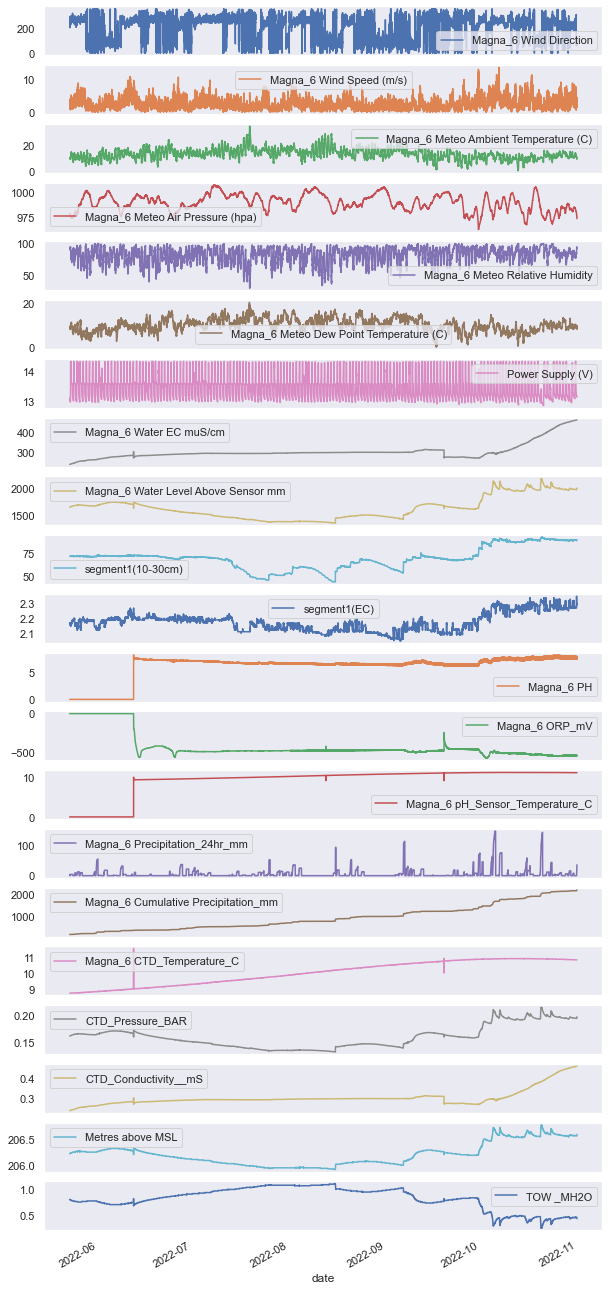

In [52]:
df.plot(subplots=True, figsize=(10,25));

In [54]:
df.to_csv('soil.csv')

In [59]:
df.columns

Index(['Magna_6 Wind Direction', 'Magna_6 Wind Speed (m/s)',
       'Magna_6 Meteo Ambient Temperature (C)',
       'Magna_6 Meteo Air Pressure (hpa)', 'Magna_6 Meteo Relative Humidity',
       'Magna_6 Meteo Dew Point Temperature (C)', 'Power Supply (V)',
       'Magna_6 Water EC muS/cm', 'Magna_6 Water Level Above Sensor mm',
       'segment1(10-30cm)', 'segment1(EC)', 'Magna_6 PH', 'Magna_6 ORP_mV',
       'Magna_6 pH_Sensor_Temperature_C', 'Magna_6 Precipitation_24hr_mm',
       'Magna_6 Cumulative Precipitation_mm', 'Magna_6 CTD_Temperature_C',
       'CTD_Pressure_BAR', 'CTD_Conductivity__mS', 'Metres above MSL',
       'TOW _MH2O'],
      dtype='object')